In [9]:
import pandas as pd
# Taken & PCA
raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')
# Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape)

(11655, 1) (11655, 200)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (8158, 200)
X_test: (3497, 200)


In [11]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=False)
model.fit(X_train,y_train)

d:\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(is_unbalance=False)

In [12]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.7995424649699743


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()

In [14]:
import numpy as np
q = np.array(y_test)
q = q.reshape((-1,))
print(q.shape)
print(pred.shape)

(3497,)
(3497,)


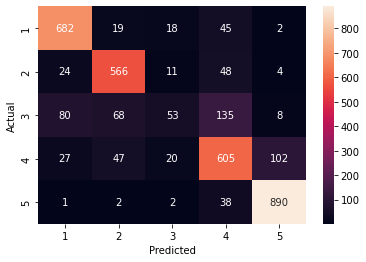

In [15]:

plot_confusion_matrix(q, pred)